Crawling Data in Twitter

# Import Library

In [1]:
import tweepy
import re
import pandas as pd
import string
import csv
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt

# Set API TOKEN

In [2]:
# access_token = "2343213590-Zv7Bg4vCjLjCch9C3S2CZmlpRmUDvmG5BED478R"
# access_token_secret = "AoRGiVKjPrtIzxkqn6lAEQJ4GboVykJa98Z7FUZbENAO4"
# api_key = "vmuJ1kTILinVnAacV7QeDAWEv"
# api_key_secret = "WUnwc7UoS3MpRVf3dLRPGSNoAXNWwqxJRqSdyp8DKfH4MnBDnz"

In [3]:
api_key = "earScsYmfXq5tOUpzEziXxKwt"

api_key_secret = "C6VouJVg0UUahbSqasFQAcRUE3dNdnaZFamS9zrXnp4cqOvAyP"

access_token = "66106451-UFbSuHUjKFViuD5RaW3B14AIMmzlEcuEMFK4xrZCu"

access_token_secret = "xw78fGFsSmdX3KXZpHIgcU03yK64gxoYfZ2lfjhyZ5stU"

In [4]:
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# Melakukan pencarian sesuai keyword

In [5]:
keyword = input("Masukan keyword: ")
naOfTweet = int(input('Jumlah tweet untuk di analisa: '))
tweets = tweepy.Cursor(api.search, q=keyword, lang='id').items(naOfTweet)
tweet_list = []
tweet_user = []
tweet_id = []
tweet_loc = []

for tweet in tweets:
  print(tweet.text)
  tweet_list.append(tweet.text)
  tweet_user.append(tweet.user.screen_name)
  tweet_id.append(tweet.user.id)
  tweet_loc.append(tweet.user.location)

Masukan keyword: hujan
Jumlah tweet untuk di analisa: 300
ya Allah kapan hujan uang
RT @teamnyaSKIA: 🌳 Hyunjin &amp; I.N Birthday Campaign 2023 : Save the Rainforest, Save Yourself🌳

Dalam rangka ulang tahun Hyunjin &amp; I.N, kami…
Hujan deras banget pren
Komposisi tanah dan curah hujan yang tidak sama dilereng-lereng yang tinggi letaknya justru terlalu banyak
- Pada minggu ini terjadi hujan di Pos Pengamatan G. Merapi dengan intensitas curah hujan sebesar 41 mm/jam selama… https://t.co/QKBUt2deBs
@convomf 1. jalan berlumut dan habis hujan
2. ban depan masuk pinggiran jalan gabisa balik (jalan cor sama jalan ta… https://t.co/2ECcwGZmvd
Wkwk pernah karna habis hujan jalan licin kebetulan waktu itu ada lewat tanah kuning, pernah stang nyangkut sama mo… https://t.co/eY8Ou2xTbK
RT @heyitsmendels: “aku ingin berjalan bersamamu , dalam hujan dan malam gelap tapi aku tak bisa melihat matamu.”

oiii😭😭 https://t.co/5cS8…
RT @nctzenbase: jaemin gak ada angin, gak ada hujan: masuk tol kalo hari 

# Membuat dataframe yang isinya kumpulan tweet

Hiburang, olahraga, pendidikan, teknologi, dan politik
cari tweetnya, trus analisa sentimen positif/negatif
datanya 200
cari -> cleaning -> word cloud -> 
(keseluruhan, +, -)


In [6]:
dictTweets = {'waktu':tweet_loc,'id':tweet_id,'username':tweet_user,'tweet':tweet_list}
df = pd.DataFrame(dictTweets, columns=['username','tweet'])
df

,username,tweet
0,matchaapiee,ya Allah kapan hujan uang
1,mirnariana01,RT @teamnyaSKIA: 🌳 Hyunjin &amp; I.N Birthday ...
2,alyaell,Hujan deras banget pren
3,InfoMadura3,Komposisi tanah dan curah hujan yang tidak sam...
4,BPPTKG,- Pada minggu ini terjadi hujan di Pos Pengama...
...,...,...
295,jba_auction,Hujan Cuan di JBA\n\nDapatkan Voucher Cakra Mo...
296,abcdefina_,RT @jojiaappa: @Askrlfess enak nunggu dijemput...
297,leonparung,Maaf hujan terus. Soalnya aku terlalu setia hi...
298,xyz_mblue,ON REPEAT HAHAHHAA MANA LAGI HUJAN


# Membersihkan tweet

In [7]:
dictTweets = pd.DataFrame(tweet_list)
dictTweets["text"] = dictTweets[0]

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('@[^\s]+','',text)
    text = re.sub('rt', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub(' +', ' ', text)
    return text

In [8]:
dictTweets['text'] = dictTweets['text'].apply(lambda x:clean_text(x))
df_fix=pd.DataFrame(dictTweets['text'])
df_fix

,text
0,ya allah kapan hujan uang
1,🌳 hyunjin amp in bihday campaign save the rai...
2,hujan deras banget pren
3,komposisi tanah dan curah hujan yang tidak sam...
4,pada minggu ini terjadi hujan di pos pengamat...
...,...
295,hujan cuan di jbadapatkan voucher cakra motor ...
296,enak nunggu dijemput tauu kita masih bisa jaj...
297,maaf hujan terus soalnya aku terlalu setia hin...
298,on repeat hahahhaa mana lagi hujan


Membuang data duplikat

In [9]:
df_fix.drop_duplicates(inplace=True)
df_fix

,text
0,ya allah kapan hujan uang
1,🌳 hyunjin amp in bihday campaign save the rai...
2,hujan deras banget pren
3,komposisi tanah dan curah hujan yang tidak sam...
4,pada minggu ini terjadi hujan di pos pengamat...
...,...
295,hujan cuan di jbadapatkan voucher cakra motor ...
296,enak nunggu dijemput tauu kita masih bisa jaj...
297,maaf hujan terus soalnya aku terlalu setia hin...
298,on repeat hahahhaa mana lagi hujan


# fungsi tokenisasi (Memecah kalimat menjadi beberapa kata)

In [10]:
def tokenizingText(text):
  text = word_tokenize(text)
  return text

In [11]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
df_fix['text_preprocessed'] = df_fix['text'].apply(tokenizingText)
df_fix

,text,text_preprocessed
0,ya allah kapan hujan uang,"[ya, allah, kapan, hujan, uang]"
1,🌳 hyunjin amp in bihday campaign save the rai...,"[🌳, hyunjin, amp, in, bihday, campaign, save, ..."
2,hujan deras banget pren,"[hujan, deras, banget, pren]"
3,komposisi tanah dan curah hujan yang tidak sam...,"[komposisi, tanah, dan, curah, hujan, yang, ti..."
4,pada minggu ini terjadi hujan di pos pengamat...,"[pada, minggu, ini, terjadi, hujan, di, pos, p..."
...,...,...
295,hujan cuan di jbadapatkan voucher cakra motor ...,"[hujan, cuan, di, jbadapatkan, voucher, cakra,..."
296,enak nunggu dijemput tauu kita masih bisa jaj...,"[enak, nunggu, dijemput, tauu, kita, masih, bi..."
297,maaf hujan terus soalnya aku terlalu setia hin...,"[maaf, hujan, terus, soalnya, aku, terlalu, se..."
298,on repeat hahahhaa mana lagi hujan,"[on, repeat, hahahhaa, mana, lagi, hujan]"


# Memasukan kamus (kata positif & negatif)

In [13]:
lexicon_positive = dict()
import csv
with open('positive_lex.csv', 'r') as csvfile:
    pos_word = csv.reader(csvfile, delimiter=',')
    next(pos_word, None)
    for row in pos_word:
      lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('negatif_lex.csv', 'r') as csvfile:
    neg_word = csv.reader(csvfile, delimiter=',')
    next(neg_word, None)
    for row in neg_word:
        lexicon_negative[row[0]] = int(row[1])

# Fungsi analisis secara perulangan

In [14]:
def sentiment_analysis(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    sentimen=''
    if (score > 0):
        sentimen = 'positive'
    elif (score < 0):
        sentimen = 'negative'
    else:
        sentimen = 'neutral'
    return score, sentimen

Menghitung jumlah tweet bersifat negatif, positif, & neutral

negative    188
positive     63
neutral      21
Name: sentimen, dtype: int64


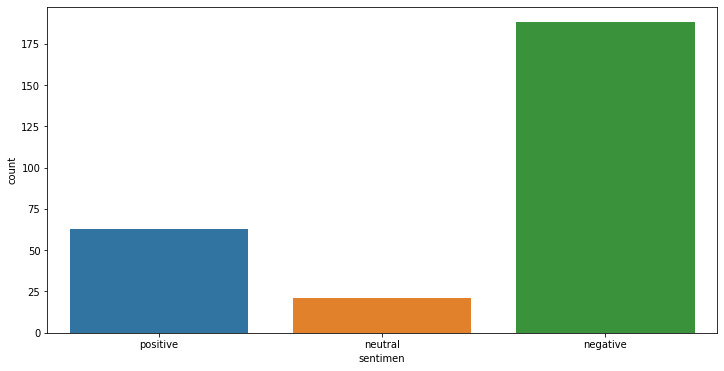

In [15]:
results = df_fix['text_preprocessed'].apply(sentiment_analysis)
results = list(zip(*results))
df_fix['sentimen_score'] = results[0]
df_fix['sentimen'] = results[1]
print(df_fix['sentimen'].value_counts())

plt.figure(figsize=(12,6))
sns.countplot(x='sentimen',data=df_fix)



In [16]:
df_fix

,text,text_preprocessed,sentimen_score,sentimen
0,ya allah kapan hujan uang,"[ya, allah, kapan, hujan, uang]",8,positive
1,🌳 hyunjin amp in bihday campaign save the rai...,"[🌳, hyunjin, amp, in, bihday, campaign, save, ...",0,neutral
2,hujan deras banget pren,"[hujan, deras, banget, pren]",-1,negative
3,komposisi tanah dan curah hujan yang tidak sam...,"[komposisi, tanah, dan, curah, hujan, yang, ti...",-15,negative
4,pada minggu ini terjadi hujan di pos pengamat...,"[pada, minggu, ini, terjadi, hujan, di, pos, p...",-2,negative
...,...,...,...,...
295,hujan cuan di jbadapatkan voucher cakra motor ...,"[hujan, cuan, di, jbadapatkan, voucher, cakra,...",-2,negative
296,enak nunggu dijemput tauu kita masih bisa jaj...,"[enak, nunggu, dijemput, tauu, kita, masih, bi...",-1,negative
297,maaf hujan terus soalnya aku terlalu setia hin...,"[maaf, hujan, terus, soalnya, aku, terlalu, se...",-12,negative
298,on repeat hahahhaa mana lagi hujan,"[on, repeat, hahahhaa, mana, lagi, hujan]",-4,negative


# Membuat dataframe tweet sesuai dengan sentimen

In [17]:
df_fix_neutral = df_fix[df_fix["sentimen"] == 'neutral']
df_fix_positive = df_fix[df_fix["sentimen"] == 'positive']
df_fix_negative = df_fix[df_fix["sentimen"] == 'negative']

In [18]:
df_fix_negative.sort_values('sentimen_score')

,text,text_preprocessed,sentimen_score,sentimen
120,manik teduh itu selalu memayungi ku saat badai...,"[manik, teduh, itu, selalu, memayungi, ku, saa...",-21,negative
171,cuma satu jer masa tu pinggang mmg sakit dan ...,"[cuma, satu, jer, masa, tu, pinggang, mmg, sak...",-18,negative
77,perawatan pohon yang besar dengan mengurangi c...,"[perawatan, pohon, yang, besar, dengan, mengur...",-17,negative
179,karena ojek online yang ngerem ngedadak pake ...,"[karena, ojek, online, yang, ngerem, ngedadak,...",-17,negative
160,banjir itu bukan salah penataan kota tapi karn...,"[banjir, itu, bukan, salah, penataan, kota, ta...",-16,negative
...,...,...,...,...
206,hujan gak,"[hujan, gak]",-1,negative
204,hujan tapii yaa ituu hareudangg 😞😞,"[hujan, tapii, yaa, ituu, hareudangg, 😞😞]",-1,negative
201,herubudihaono ini saya meninjau kawasan banta...,"[herubudihaono, ini, saya, meninjau, kawasan, ...",-1,negative
92,semoga teu macet dan teu hujan,"[semoga, teu, macet, dan, teu, hujan]",-1,negative


Word Cloud Neutral


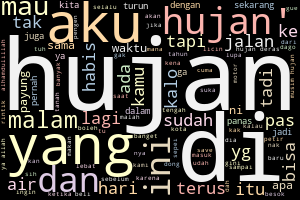

Word Cloud Neutral


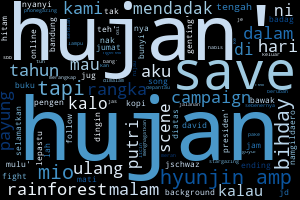

Word Cloud Positive


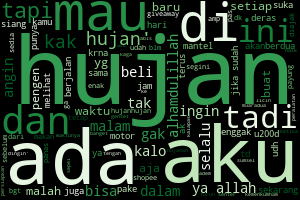

Word Cloud Negative


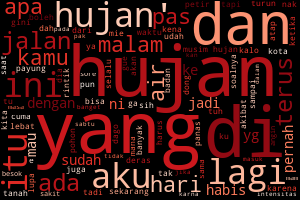

In [19]:
#Function to Create Wordcloud Neutral
def create_wordcloud_all(text):
    #mask = np.array(Image.open("../input/cloudpng/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="black",
    colormap='Pastel1',
    width = 300, height = 200,
    max_words=100,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Neutral")
    path="wc.png"
    display(Image.open(path))

create_wordcloud_all(df_fix["text"].values)

#Function to Create Wordcloud Neutral
def create_wordcloud_neutral(text):
    #mask = np.array(Image.open("../input/cloudpng/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="black",
    colormap='Blues',
    width = 300, height = 200,
    max_words=100,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Neutral")
    path="wc.png"
    display(Image.open(path))

create_wordcloud_neutral(df_fix_neutral["text"].values)

#Function to Create Wordcloud
def create_wordcloud_positive(text):
    #mask = np.array(Image.open("../input/cloudpng/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="black",
    colormap='Greens',
    width = 300, height = 200,
    max_words=100,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Positive")
    path="wc.png"
    display(Image.open(path))

create_wordcloud_positive(df_fix_positive["text"].values)

#Function to Create Wordcloud
def create_wordcloud_negative(text):
    #mask = np.array(Image.open("../input/cloudpng/cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="black",
    colormap='Reds',
    width = 300, height = 200,
    max_words=100,
    stopwords=stopwords,
    repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Negative")
    path="wc.png"
    display(Image.open(path))

create_wordcloud_negative(df_fix_negative["text"].values)